#  Лабораторная работа 2.

### Статистический ряд. Построение гистограммы равноинтервальным методом. Построение гистограммы равновероятностным методом.

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
from prettytable import PrettyTable

*Задание величины n (объем выборки и последующее формирование случайной величины Y = f(xᵢ):*

In [3]:
a = -2
b = 2

def Y(x):
    return x*x

In [4]:
n = int(input("Enter n. "))

Enter n. 500


In [5]:
eps = [np.random.uniform(0, 1) for i in range(n)]
x = [(ei*(b-a) + a) for ei in eps]
y = [Y(xi) for xi in x]
variation = sorted(y)

*Полученный вариационный ряд:*

In [6]:
print_variation = [round(v, 6) for v in variation]
print(print_variation)

[1e-06, 1e-05, 2.6e-05, 0.000133, 0.000162, 0.000234, 0.0004, 0.000555, 0.000854, 0.001212, 0.001671, 0.001929, 0.002912, 0.003604, 0.003693, 0.004698, 0.008678, 0.008836, 0.010709, 0.011724, 0.013034, 0.013173, 0.014072, 0.014428, 0.014445, 0.01523, 0.017119, 0.018822, 0.019357, 0.019751, 0.019809, 0.021887, 0.023802, 0.023981, 0.024146, 0.02562, 0.026094, 0.029613, 0.029983, 0.03191, 0.035709, 0.037706, 0.038348, 0.039362, 0.044024, 0.046165, 0.046528, 0.047477, 0.047928, 0.049504, 0.052314, 0.055304, 0.061752, 0.063048, 0.069363, 0.070509, 0.0723, 0.072592, 0.073861, 0.076015, 0.078853, 0.078913, 0.079585, 0.08065, 0.083559, 0.08378, 0.086507, 0.086543, 0.087915, 0.089632, 0.090291, 0.091365, 0.091865, 0.093113, 0.09615, 0.102567, 0.102664, 0.10351, 0.105913, 0.109078, 0.111215, 0.113308, 0.115719, 0.116109, 0.116351, 0.118165, 0.120761, 0.12495, 0.125736, 0.129469, 0.130584, 0.131223, 0.131495, 0.133287, 0.136137, 0.139142, 0.140891, 0.142684, 0.143701, 0.146582, 0.151248, 0.15217,

*Найдена теоретическая плотность распределения СВ Y и ее функцию распределения:*

In [7]:
def f(y):
    return 1/(4 * y**0.5)


def F(y):
    return y**0.5/2

*Выбор параметра M (количества интервалов для группирования данных):*

In [8]:
if n <= 100:
    M = int(n**0.5)
else:
    M = int(random.uniform(2, 4) * math.log10(n))

*Определение вспомогательных функций:*

In [9]:
# Определение количества значений,
# попадающих в пределы заданного интервала:
def number_of_values_on_interval(M, variation, A_intervals, B_intervals):
    v_interval = [0] * M
    for i in range(0, M):
        for value in variation:
            if A_intervals[i] < value < B_intervals[i]:
                v_interval[i] += 1
            if value == B_intervals[i] and i != M - 1:
                v_interval[i] += 0.5
                v_interval[i + 1] += 0.5
    v_interval[0] += 1
    v_interval[-1] += 1
    return v_interval


# Определение интервала для значений Y = f(xᵢ)
def find_borders():
    ay = Y(a)
    by = Y(b)
    xes = np.arange(a, b + 0.001, 0.001)
    for x in xes:
        ay = min(ay, Y(x))
        by = max(by, Y(x))
    ay = round(ay, 2)
    by = round(by, 2)
    return ay, by


# Построение гистограммы и полигона распределения
def histogram_n_polygon(M, func, A, B):
    plt.title("Гистограмма\n и полигон\n распределения")
    max_height = [0] * (M + 1)
    for i in range(M):
        max_height[i] = max(func[i-1], func[i])
    max_height[0] = func[0]
    max_height[-1] = func[-1]
    plt.hlines(func, A, B, color='red')
    plt.axhline(0, color='red')
    A.append(B[-1])
    plt.vlines(A, [0], max_height, color='red')
    plt.xlim(A[0] - 0.5, B[-1] + 0.5)
    middle = [(A[i] + A[i + 1])/2 for i in range(M)]
    plt.plot(middle, func, color='blue')


# Построение графика теоретической функции распределения
def theor_density(ay, by, A, B, func):
    plt.title("Теоретическая\n плотность\n  распределения")
    xes = np.arange(ay, by, 0.001)
    ys = [f(x) for x in xes if x != 0]
    xes = [x for x in xes if x != 0]
    plt.ylim(-0.1, max(func) + 0.2)
    plt.xlim(A[0] - 0.5, B[-1] + 0.5)
    plt.hlines(0, A[0] - 0.5, 0, color='blue')
    plt.hlines(0, 4, B[-1] + 0.5, color='blue')
    plt.plot(xes, ys, color='blue')


# Построение графика эмпирической функции распределения
def emp_function(func, A, B, M):
    plt.title("Эмпирическая\n функция\n  распределения")
    F_emp = [0] * M
    F_emp[0] = func[0]*(B[0] - A[0])
    for i in range(1, M):
        F_emp[i] += F_emp[i-1] + func[i] * (B[i] - A[i])
    plt.hlines(F_emp, A, B, lw=2)
    print("Empirical function")
    f_emp_table = PrettyTable()
    f_emp_table.field_names = ["Interval", "f emp"]
    for i in range(len(func)):
        f_emp_table.add_row(["%.4f" % A[i] + " : " + "%.4f" % B[i], func[i]])
    print(f_emp_table)
    
# Построение графика эмпирической функции распределения,
# гистограммы, полигона распределения и теоретической функции
# распределения в одном окне
def graphics(M, func, A, B):
    plt.subplot(1, 3, 1)
    histogram_n_polygon(M, func, A, B)
    plt.grid()
    plt.subplot(1, 3, 2)
    ay, by = find_borders()
    theor_density(ay, by, A, B, func)
    plt.grid()
    plt.subplot(2, 3, 3)
    emp_function(func, A, B, M)
    plt.grid()
    plt.show()

*Построение гистограммы равноинтервальным методом, полигона распределения и эмпирической функции распределения и представление результатов в виде таблицы и графика с сопутствующим сравнением графиков теоретической и эмпирической плотностей распределения:*

In [10]:
def interval_method(variation, M, n):       # равноинтервальный метод
    delta = (variation[-1] - variation[0])/M
    A_intervals = [variation[0] + (i-1)*delta for i in range(1, M+1)]
    B_intervals = [variation[0] + i*delta for i in range(1, M+1)]
    v_interval = number_of_values_on_interval(M, variation, A_intervals, B_intervals)
    f_interv = [v_interval[i]/(n*delta) for i in range(M)]  # эмпирическая функция плотности распределения
    return A_intervals, B_intervals, f_interv

Равноинтервальный метод: 

Empirical function
+-----------------+---------------------+
|     Interval    |        f emp        |
+-----------------+---------------------+
| 0.0000 : 0.4437 |  0.7662227453425408 |
| 0.4437 : 0.8875 | 0.33803944647465034 |
| 0.8875 : 1.3312 | 0.18028770478648018 |
| 1.3312 : 1.7749 |  0.1893020900258042 |
| 1.7749 : 2.2187 | 0.16676612692749415 |
| 2.2187 : 2.6624 | 0.14423016382918413 |
| 2.6624 : 3.1061 | 0.15324454906850815 |
| 3.1061 : 3.5499 | 0.16676612692749415 |
| 3.5499 : 3.9936 | 0.14873735644884614 |
+-----------------+---------------------+


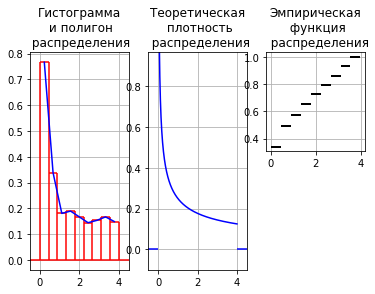

In [11]:
A_intervals, B_intervals, f_interv = interval_method(variation, M, n)
print("Равноинтервальный метод: \n")
graphics(M, f_interv, A_intervals, B_intervals)

*Построение гистограммы равновероятностным методом, полигона распределения и эмпирической функции распределения и представление результатов в виде таблицы и графика с сопутствующим сравнением графиков теоретической и эмпирической плотностей распределения:*

In [12]:
def possibility_method(variation, M, n):         # равновероятностный метод
    mi = n // M
    B_pos = [(variation[i * mi] + variation[i * mi + 1]) / 2 for i in range(1, M)] + [variation[-1]]
    A_pos = [variation[0]] + B_pos[:-1]
    delta_pos = [B_pos[i] - A_pos[i] for i in range(M)]
    v_pos = number_of_values_on_interval(M, variation, A_pos, B_pos)
    f_pos = [v_pos[i] / (n * delta_pos[i]) for i in range(M)]
    return A_pos, B_pos, f_pos

Равновероятностный метод: 

Empirical function
+-----------------+---------------------+
|     Interval    |        f emp        |
+-----------------+---------------------+
| 0.0000 : 0.0714 |  1.5685629477756233 |
| 0.0714 : 0.1966 |  0.8786774591093887 |
| 0.1966 : 0.4294 |  0.4724825041350031 |
| 0.4294 : 0.7278 | 0.36865292593652316 |
| 0.7278 : 1.2005 | 0.23271995375579285 |
| 1.2005 : 1.8294 |  0.1748859807967686 |
| 1.8294 : 2.5529 | 0.15203767295302556 |
| 2.5529 : 3.1829 | 0.17460270940534056 |
| 3.1829 : 3.9936 |  0.1455585623468862 |
+-----------------+---------------------+


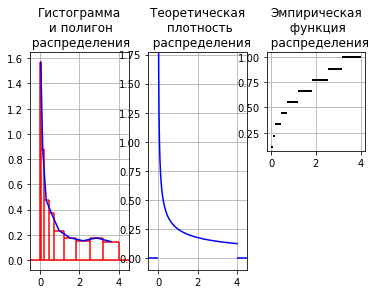

In [13]:
A_pos, B_pos, f_pos = possibility_method(variation, M, n)
print("Равновероятностный метод: \n")
graphics(M, f_pos, A_pos, B_pos)